# import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [175]:
from sklearn.model_selection  import train_test_split

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 0 :  READING THE DATA

In [2]:
data=pd.read_csv('Fytlyff_DS_Interview.csv')

this returns the top 5 rows of the dataframe

In [12]:
data.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


In [14]:
#data.isnull().sum()

# column names

In [5]:
data.columns

Index(['Year', 'Month', 'MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?',
       'How_many_Landed_on_our_Page?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'],
      dtype='object')

# Datatypes of given columns

In [10]:
data.dtypes

Year                                                                                                                           int64
Month                                                                                                                         object
MobileWeb_or_Web                                                                                                              object
Type_of_Customers?                                                                                                            object
Where_Are_They_comming_from?                                                                                                  object
Which_Place_in_India?                                                                                                         object
How_many_Landed_on_our_Page?                                                                                                 float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?             

# Part 1 : DATA CLEANING 

i) Replaces the NA values with 0s in the data

ii) In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…

iii) In column ‘E’ Replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic” 


In [70]:
# firstly we will check how many columns have null values and its count
data.isnull().sum()

Year                                                                                                                         0
Month                                                                                                                        0
MobileWeb_or_Web                                                                                                             0
Type_of_Customers?                                                                                                           0
Where_Are_They_comming_from?                                                                                                 0
Which_Place_in_India?                                                                                                        0
How_many_Landed_on_our_Page?                                                                                                 0
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?                                                       

In [41]:
from time import strptime  # to convert month name to numeric value

defining a function

In [123]:
def data_cleaning(col):
    data.fillna(0,inplace=True)
    if i=='Month':
       data['Month'] = [strptime(str(x), '%m').tm_mon for x in data['Month']] 
    elif i=='Where_Are_They_comming_from?':
        data['Where_Are_They_comming_from?']= data['Where_Are_They_comming_from?'].replace(['Came_From_Google','Landed_on_the_page_Directly'],['Google','Direct_traffic'])
        
        
        

In [124]:
for i in ['Month','Where_Are_They_comming_from?', 'How_many_Landed_on_our_Page?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']:
    data_cleaning(i)     # function call
             

# Part 2: DESCRIPTIVE STATISTICS


In [72]:
data.columns

Index(['Year', 'Month', 'MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?',
       'How_many_Landed_on_our_Page?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'],
      dtype='object')

In [356]:
def descriptive_stats(col):  
    if col in ['Year', 'Month', 'How_many_Landed_on_our_Page?',
        'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
        'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
        'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']:
        
        print(data[col].describe(),'\n')
    else:
        print(data[col].unique(), ': ', data[col].dtypes)
        
        
        


In [358]:
for i in ['Year', 'Month', 'How_many_Landed_on_our_Page?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']:
    descriptive_stats(i)
for j in ['MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?']:
    descriptive_stats(j)
    

count    2160.000000
mean     2020.000000
std         0.816686
min      2019.000000
25%      2019.000000
50%      2020.000000
75%      2021.000000
max      2021.000000
Name: Year, dtype: float64 

count    2160.000000
mean        6.500000
std         3.452852
min         1.000000
25%         3.750000
50%         6.500000
75%         9.250000
max        12.000000
Name: Month, dtype: float64 

count    2.160000e+03
mean     3.922474e+05
std      9.555773e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.228350e+04
75%      3.816422e+05
max      1.127413e+07
Name: How_many_Landed_on_our_Page?, dtype: float64 

count    2.160000e+03
mean     1.792281e+05
std      3.951562e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.212500e+03
75%      1.730452e+05
max      4.079301e+06
Name: How_many_Landed_on_the_our_Page_and_clicked_on_a_button?, dtype: float64 

count    2.160000e+03
mean     1.510725e+05
std      2.353538e+05
min      3.761000e+03
25%      3.360800e+04
50%      

# Part 3: PRESCRIPTIVE STATISTICS

In [156]:
data[['Which_Place_in_India?','How_many_Landed_on_our_Page?']].max()

Which_Place_in_India?                 Pune
How_many_Landed_on_our_Page?    11274131.0
dtype: object

In [167]:
data['div_data']=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']/data['How_many_Landed_on_our_Page?']

In [168]:
data[['div_data','Which_Place_in_India?']].max()

div_data                  inf
Which_Place_in_India?    Pune
dtype: object

# Part 4: SIMPLE MACHINE LEARNING QUESTIONS

In [209]:
X= data.drop(['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?','MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?','div_data'],axis=1)

In [383]:
x=X[720:1440]
# data1=data[2019< data['Year'] ]
# data1
x

,Year,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?
720,2020,1,0.0,0.0,51753
721,2020,1,0.0,0.0,112924
722,2020,1,0.0,0.0,44096
723,2020,1,0.0,0.0,134562
724,2020,1,0.0,0.0,189015
...,...,...,...,...,...
1435,2020,12,66917.0,23132.0,6618
1436,2020,12,117097.0,58525.0,24731
1437,2020,12,46111.0,25422.0,5697
1438,2020,12,466715.0,207872.0,107705


In [384]:
x

,Year,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?
720,2020,1,0.0,0.0,51753
721,2020,1,0.0,0.0,112924
722,2020,1,0.0,0.0,44096
723,2020,1,0.0,0.0,134562
724,2020,1,0.0,0.0,189015
...,...,...,...,...,...
1435,2020,12,66917.0,23132.0,6618
1436,2020,12,117097.0,58525.0,24731
1437,2020,12,46111.0,25422.0,5697
1438,2020,12,466715.0,207872.0,107705


In [213]:
x.shape

(718, 5)

In [215]:
Y=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']

In [385]:
y=Y[720:1440]

In [396]:
def pred_future(i,j):
   # X_train,y_train= train_test_split(x,y,random_state=0)
    model_linear_reg= LinearRegression()
    model=model_linear_reg.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    print('Prediction for the year 2021 :',y_pred)
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    print('\n')
    print(' MAPE of prediction for the year 2021 is : ',mape)

In [395]:
pred_future(x,y)


Prediction for the year 2021 : [157870.60423691  15996.62356886  31891.32741465  47591.64971105
  15857.95312842  70184.88850465 116028.38935887  21020.22147666
  85652.83147938  19705.96340356  21853.85115442  29894.09220956
  53900.07843798  12626.12951456  18358.92452512  28798.73991091
  41586.88244051  51589.44487827  83294.65926662  27566.72938891
  26634.68894111  24250.44458708  59871.76669058 137602.45979583
  92774.76703001  45516.17491809  64247.66293088  22819.84859073
   8314.4345259   41142.59215479  44641.37702492  27228.11616505
  19567.04929844  50191.88832587  19544.90639535  58445.61211005
  44702.63557088  12656.44631314 283347.985925    32726.94707106
 133429.7999046    8965.18482601 108628.11426792  57718.72270232
  55339.43677489  50272.26836443  75463.92513127  10477.92123004
  15952.89201851  31657.11937711  13382.17349161 138926.42952562
 117053.86943284   4992.25891761  15161.35505725  10294.68600224
  30710.1588703    6760.72283666  38010.98382698  26833.134

In [393]:
len(y_pred)

216

We tested the accuracy of our model by passing in our predictions and the actual values

In [362]:
#data[data['Year']<2021]

# Part 5: VISUALIZATION


1 : 
A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the different “Which_Place_in_India?” over the months of the year 2019 & 2020.


<AxesSubplot:xlabel='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', ylabel='Which_Place_in_India?'>

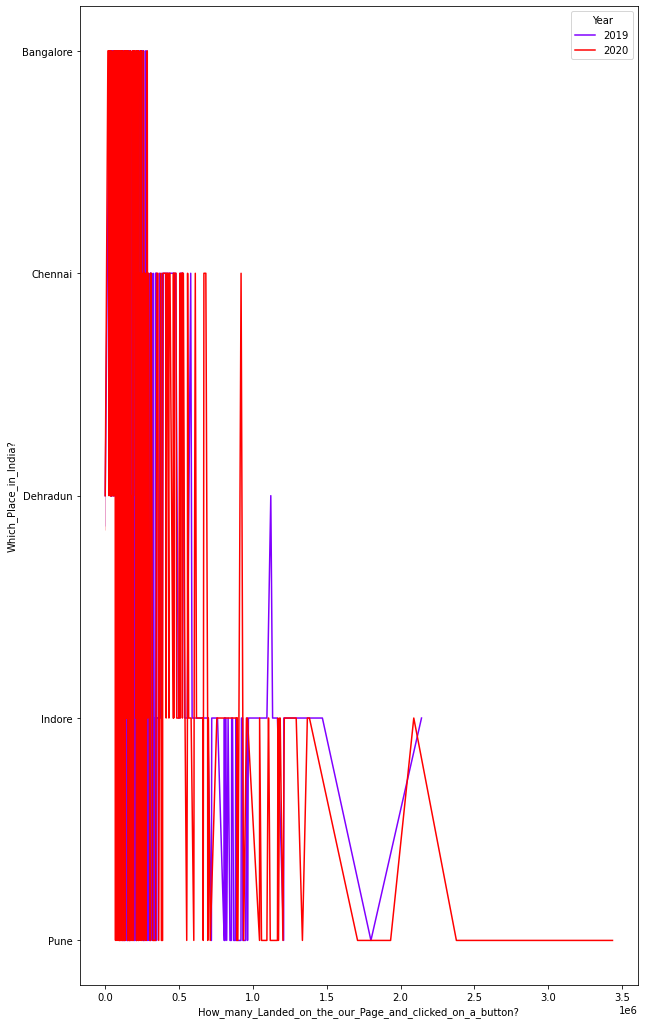

In [369]:
plt.figure(figsize=(10,18))
sns.lineplot(x='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', y="Which_Place_in_India?", data=data[data['Year']<2021], hue='Year',palette='rainbow')

.

2 : 
A line graph of the actual and projected number of “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the months of the year 2021 & 2022


In [330]:
# df= pd.DataFrame({'Actual': y_test,'predict': y_pred })

In [331]:
#sns.lineplot(x='Actual',y='predict',data=df)

# Part 6: About the Previous projects


I have been constantly learning and implimenting the Data Science and Machine Learning concepts . I've made several projects on the same which helped me understanding this domain in more detail.
I have done Prutor(IIT Kanpur) training and Internship course in DATA SCIENCE with PYTHON. I also have done UDEMY COURSE which has helped me understanding several libraries (Pandas,Matplotlib,Numpy,Seaborn,SkLearn, NLP basics etc) in details with its implimentations.

Below are the list of projects I have built during learning process :

1].  AIRLINE FLIGHT FARE PREDICTION :

2].  PASSWORD STRENGTH PREDICTION  :
  https://drive.google.com/file/d/1Z12TJVLg7glB5RYsv2D9ePtI7_HKcLgr/view?usp=sharing
    
    Project Description : I have used TF-IDF in NLP to predict the strength of password .In this project i firstly converted                           the data into array form so that dependent and independent variables can be used effectively to get                              accurate result.

3].  BREAST CANCER DETECTION :

4].  PREDICT STOCK PRICES USING TIME SERIES ANALYSIS :   (currently working)


# Part 7 : Time management


 I have this habit of managing time since i was in 9th class . For me it is very necessary to have balance of time to do all works and extra activities .This skill will decide if we will be successful or not . So, if I got selected, I will manage my time by being present in the moment ,have proper plan for managing my time. like for my college assignments i would manage them in between gaps and i will try to complete any work as soon as possible so that i have some free time for new work aswell.

THANKYOU 